In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
dfh= pd.read_csv("hour.csv")

In [3]:
dfh.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
print("📌 SHAPE BEFORE DROPPING:", dfh.shape)

print("\n📌 BASIC INFO BEFORE DROPPING")
print(dfh.info())

print("\n📌 DESCRIPTIVE STATISTICS BEFORE DROPPING")
print(dfh.describe())

📌 SHAPE BEFORE DROPPING: (17379, 17)

📌 BASIC INFO BEFORE DROPPING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memo

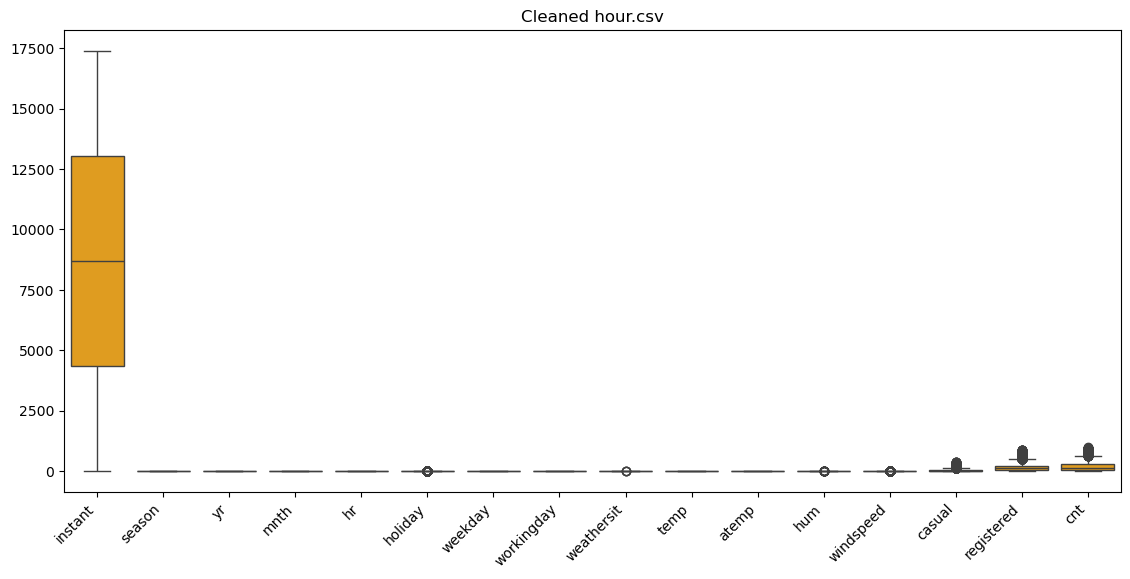

In [5]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=dfh.select_dtypes(include='number'),
    color='orange'     )

plt.title("Cleaned hour.csv")
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
columns_to_drop = ['instant','dteday',  'yr',  'casual', 'registered']

In [7]:
dfh.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print(" Columns dropped successfully!")
dfh.head()

 Columns dropped successfully!


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [8]:
columns_to_drop = [c for c in columns_to_drop if c in dfh.columns]

In [9]:
dfh_dropped = dfh.drop(columns=columns_to_drop)

In [10]:
print("\n\n📌 SHAPE AFTER DROPPING:", dfh_dropped.shape)

print("\n📌 BASIC INFO AFTER DROPPING")
print(dfh_dropped.info())

print("\n📌 DESCRIPTIVE STATISTICS AFTER DROPPING")
print(dfh_dropped.describe())



📌 SHAPE AFTER DROPPING: (17379, 12)

📌 BASIC INFO AFTER DROPPING
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB
None

📌 DESCRIPTIVE STATISTICS AFTER DROPPING
             season          mnth            hr       holiday       weekday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000

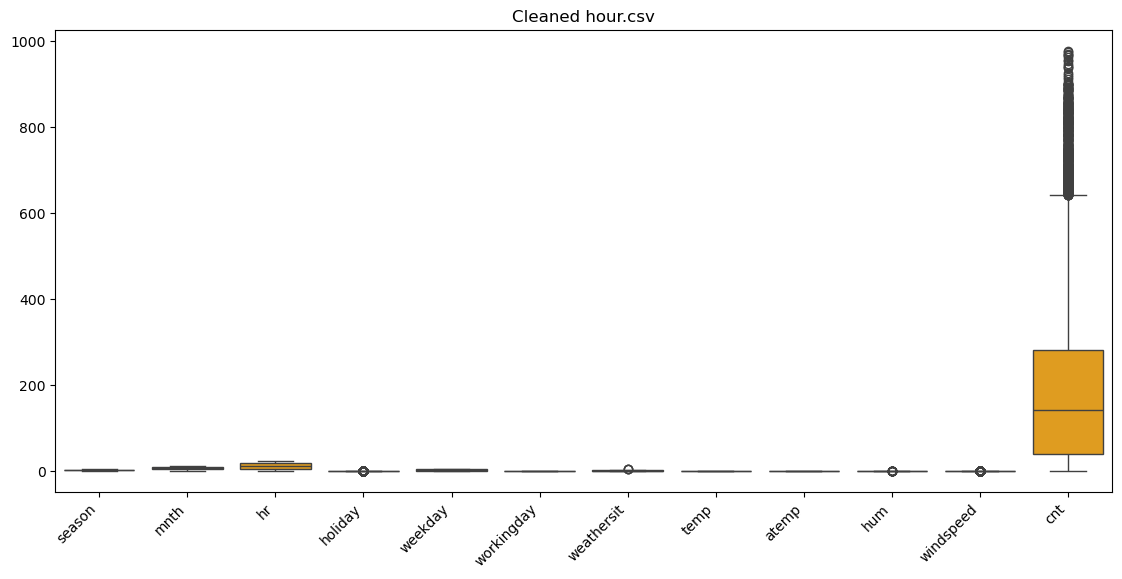

In [11]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
sns.boxplot(
    data=dfh.select_dtypes(include='number'),
    color='orange'     )

plt.title("Cleaned hour.csv")
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:

dfh_cleaned = dfh.drop(columns=columns_to_drop)

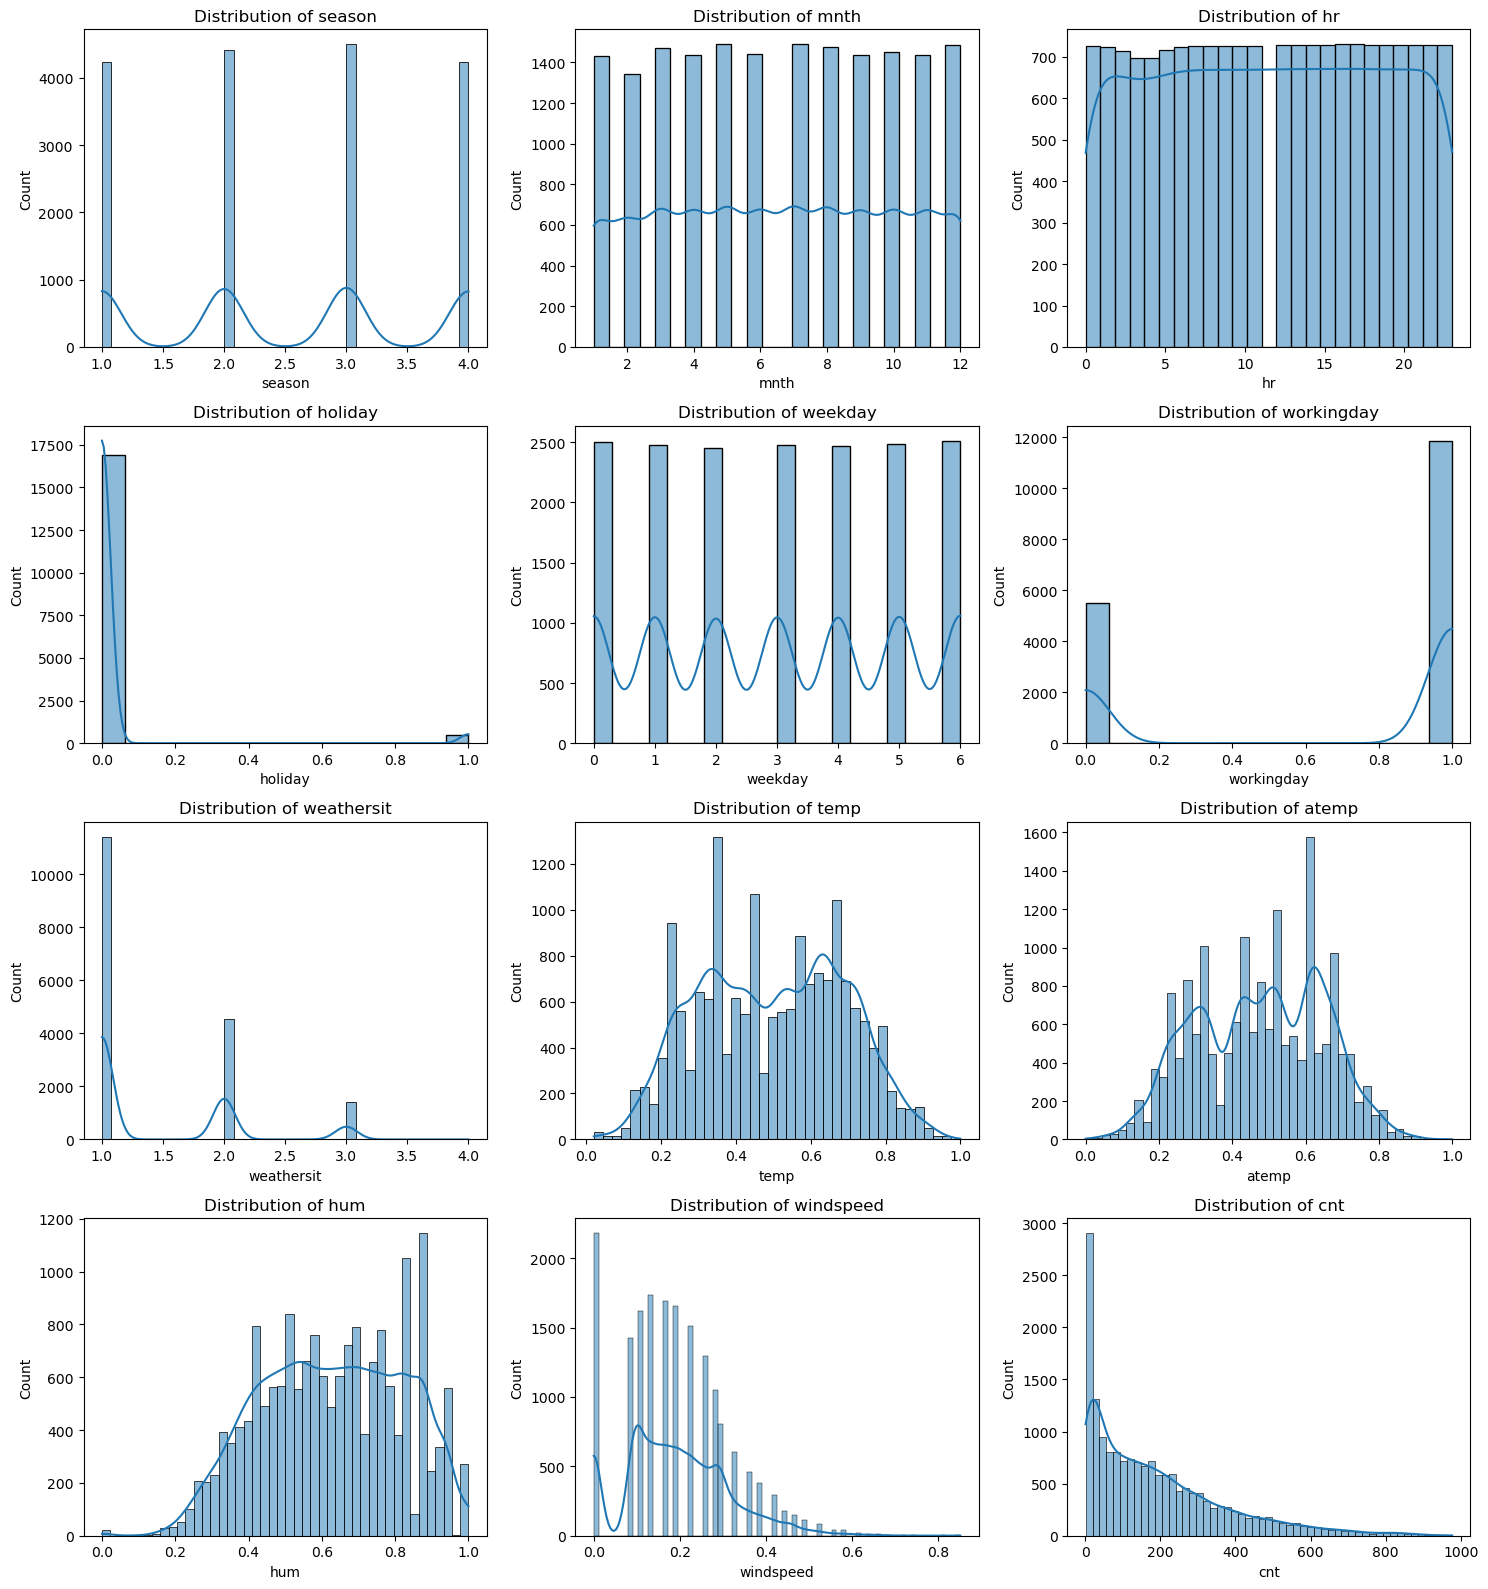

In [13]:
numeric_cols = dfh_cleaned.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(dfh_cleaned[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()